# Proposed Emoji based Method

This Jupyter notebook contains the implementation of the proposed emoji based method. It uses the 3 original csv files and 'BaseLineApproach_Final_tweets.csv' as input
Import the datasets and combine the datasets into a single dataframe

In [1]:
# Import the necessary library
import pandas as pd

# Load the datasets again
kejriwal_data = pd.read_csv("../Datasets/Arvind Kejriwal_data.csv")
modi_data = pd.read_csv("../Datasets/Narendra Modi_data.csv")
gandhi_data = pd.read_csv("../Datasets/Rahul Gandhi_data.csv")

# Combine the datasets into a single dataframe
combined_data = pd.concat([kejriwal_data, modi_data, gandhi_data], ignore_index=True)

# Display the first few rows of the combined dataset to verify
combined_data.head()


,Date,User,Tweet,Time
0,2022:10:19,bhoo_sene,@TajinderBagga Aap leaders are speaking agains...,23:47:01
1,2022:10:19,Madhusu88858324,Bjp Aap se sikh rhi h\nNarendra Modi Manish Si...,23:06:35
2,2022:10:19,PremshilaKumarp,@JaikyYadav16 Arvind kejriwal,22:56:42
3,2022:10:19,lifebecom,Arvind Kejriwal As PM Visits Gujarat School ht...,22:20:51
4,2022:10:19,sphavisha,Arvind Kejriwal's stand against rape is very c...,22:20:16


In [2]:

# Define the cleaning function to retain exclamatory marks (!) and question marks (?)
def clean_tweet_retain_special(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user mentions (@)
    tweet = re.sub(r'\@\w+', '', tweet)
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)
    tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', tweet) 
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)
    tweet = re.sub(r'^b\s+', '', tweet)
    # Convert to lowercase for uniformity (but note that this won't impact non-Latin scripts)
    tweet = tweet.lower()
    return tweet


In [3]:
import re

# Clean the tweets in the dataset without removing exclamatory marks and question marks
combined_data['Cleaned_Tweet'] = combined_data['Tweet'].apply(clean_tweet_retain_special)

# Remove duplicates based on the cleaned tweets
combined_data.drop_duplicates(subset=['Cleaned_Tweet'], keep='first', inplace=True)

# Display the first few rows after cleaning
combined_data[['Tweet', 'Cleaned_Tweet']].head()

,Tweet,Cleaned_Tweet
0,@TajinderBagga Aap leaders are speaking agains...,aap leaders are speaking against hindu gods. ...
1,Bjp Aap se sikh rhi h\nNarendra Modi Manish Si...,bjp aap se sikh rhi narendra modi manish sisod...
2,@JaikyYadav16 Arvind kejriwal,arvind kejriwal
3,Arvind Kejriwal As PM Visits Gujarat School ht...,arvind kejriwal as pm visits gujarat school
4,Arvind Kejriwal's stand against rape is very c...,arvind kejriwal's stand against rape is very c...


In [4]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter

# Tokenization using space-based split
combined_data['Tokens'] = combined_data['Cleaned_Tweet'].str.split()

In [5]:
import ast

# 1. Load the file into a dataframe
BaseLineApproach_Final_tweets = pd.read_csv('../Temp/BaseLineApproach_Final_tweets.csv')

# Convert the string representation of list to an actual list
BaseLineApproach_Final_tweets['Tokens'] = BaseLineApproach_Final_tweets['Tokens'].apply(ast.literal_eval)

# 2. Remove matching tweets from combined_data
filtered_combined_data = combined_data[~combined_data['Tweet'].isin(BaseLineApproach_Final_tweets['Tweet'])]

# Check the shape of the updated combined_data dataframe
filtered_combined_data.shape


(171770, 6)

In [6]:
combined_data.shape 

(171870, 6)

In [7]:
filtered_combined_data.shape

(171770, 6)

In [8]:
filtered_combined_data.head()

,Date,User,Tweet,Time,Cleaned_Tweet,Tokens
0,2022:10:19,bhoo_sene,@TajinderBagga Aap leaders are speaking agains...,23:47:01,aap leaders are speaking against hindu gods. ...,"[aap, leaders, are, speaking, against, hindu, ..."
1,2022:10:19,Madhusu88858324,Bjp Aap se sikh rhi h\nNarendra Modi Manish Si...,23:06:35,bjp aap se sikh rhi narendra modi manish sisod...,"[bjp, aap, se, sikh, rhi, narendra, modi, mani..."
2,2022:10:19,PremshilaKumarp,@JaikyYadav16 Arvind kejriwal,22:56:42,arvind kejriwal,"[arvind, kejriwal]"
3,2022:10:19,lifebecom,Arvind Kejriwal As PM Visits Gujarat School ht...,22:20:51,arvind kejriwal as pm visits gujarat school,"[arvind, kejriwal, as, pm, visits, gujarat, sc..."
4,2022:10:19,sphavisha,Arvind Kejriwal's stand against rape is very c...,22:20:16,arvind kejriwal's stand against rape is very c...,"[arvind, kejriwal's, stand, against, rape, is,..."


### Preprocessing for Proposed Method

In [9]:
import re

# Regular expression pattern to match emojis
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F700-\U0001F77F"  # Alchemical Symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251"
    "]+"
)

# Filter out tweets with emojis
emoji_tweets = filtered_combined_data[filtered_combined_data['Tweet'].str.contains(emoji_pattern, na=False)]

# Display the first few rows of the extracted tweets for verification
emoji_tweets[['Tweet']].head()


,Tweet
12,24x7 🅱️RE🅰️KING NEWS \nJ🅰️FFERY:Delhi Chief Mi...
43,@anamikamber Arvind kejriwal in future rakshab...
48,@dhruv_rathee i think you chamcha of arvind ke...
55,Everyone isn't as visionary or concerned with ...
58,@ndtv Everyone isn't as visionary or concerned...


In [10]:
pd.set_option('display.max_colwidth', None)
# Display the first few rows of the extracted tweets for verification
emoji_tweets[['Tweet']].head()

,Tweet
12,24x7 🅱️RE🅰️KING NEWS \nJ🅰️FFERY:Delhi Chief Minister Arvind Kejriwal urges to Prime Minister Narendra Modi to work together to improve the country’s schools.
43,@anamikamber Arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh \nJust wait for it!🙃
48,@dhruv_rathee i think you chamcha of arvind kejriwal 😃😃😃😀👍
55,Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳 #AAP #Punjab #biofuel https://t.co/rWpKd19mZN
58,@ndtv Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳 #AAP


In [11]:
def split_sentences_with_emoji_adjustment(tweet):
    # Split the tweet into segments based on the delimiters, but also keep the delimiters (including emojis)
    segments = re.split(r'([.!?]|\n|' + emoji_pattern.pattern + ')', tweet)
    
    # Group the segments to combine text with the trailing delimiter or emoji
    grouped_segments = [''.join(segments[i:i+2]) for i in range(0, len(segments), 2)]
    
    # Adjust for segments starting with an emoji
    adjusted_segments = []
    for seg in grouped_segments:
        if re.match(emoji_pattern, seg) and adjusted_segments:  # If segment starts with an emoji
            adjusted_segments[-1] += seg
        else:
            adjusted_segments.append(seg.strip())
    
    # Return the adjusted segments after stripping unnecessary whitespace and filtering out empty strings
    return [s for s in adjusted_segments if s and not s.isspace()]

# Apply the function to the tweets
emoji_tweets['Sentences'] = emoji_tweets['Tweet'].apply(split_sentences_with_emoji_adjustment)

# Display a few tweets and their corresponding sentences for verification
emoji_tweets[['Tweet', 'Sentences']].head()


C:\Users\harsh\AppData\Local\Temp/ipykernel_8580/529217978.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emoji_tweets['Sentences'] = emoji_tweets['Tweet'].apply(split_sentences_with_emoji_adjustment)


,Tweet,Sentences
12,24x7 🅱️RE🅰️KING NEWS \nJ🅰️FFERY:Delhi Chief Minister Arvind Kejriwal urges to Prime Minister Narendra Modi to work together to improve the country’s schools.,"[24x7 🅱️, RE🅰️, KING NEWS, J🅰️, FFERY:Delhi Chief Minister Arvind Kejriwal urges to Prime Minister Narendra Modi to work together to improve the country’s schools.]"
43,@anamikamber Arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh \nJust wait for it!🙃,"[@anamikamber Arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh, Just wait for it!🙃]"
48,@dhruv_rathee i think you chamcha of arvind kejriwal 😃😃😃😀👍,[@dhruv_rathee i think you chamcha of arvind kejriwal 😃😃😃😀👍]
55,Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳 #AAP #Punjab #biofuel https://t.co/rWpKd19mZN,"[Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳, #AAP #Punjab #biofuel https://t., co/rWpKd19mZN]"
58,@ndtv Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳 #AAP,"[@ndtv Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳, #AAP]"


In [12]:
# Apply the function to the 'Cleaned' column of the tweets
emoji_tweets['Cleaned_Sentences'] = emoji_tweets['Cleaned_Tweet'].apply(split_sentences_with_emoji_adjustment)

# Display a few tweets and their corresponding cleaned sentences for verification
emoji_tweets[['Tweet', 'Cleaned_Sentences']].head()


C:\Users\harsh\AppData\Local\Temp/ipykernel_8580/877074407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emoji_tweets['Cleaned_Sentences'] = emoji_tweets['Cleaned_Tweet'].apply(split_sentences_with_emoji_adjustment)


,Tweet,Cleaned_Sentences
12,24x7 🅱️RE🅰️KING NEWS \nJ🅰️FFERY:Delhi Chief Minister Arvind Kejriwal urges to Prime Minister Narendra Modi to work together to improve the country’s schools.,"[24x7 🅱️, re🅰️, king news j🅰️, ffery:delhi chief minister arvind kejriwal urges to prime minister narendra modi to work together to improve the country’s schools.]"
43,@anamikamber Arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh \nJust wait for it!🙃,[arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it!🙃]
48,@dhruv_rathee i think you chamcha of arvind kejriwal 😃😃😃😀👍,[think you chamcha of arvind kejriwal 😃😃😃😀👍]
55,Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳 #AAP #Punjab #biofuel https://t.co/rWpKd19mZN,"[everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳, #aap #punjab #biofuel]"
58,@ndtv Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳 #AAP,"[everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳, #aap]"


In [13]:
emoji_tweets[['Tweet', 'Cleaned_Sentences']].iloc[10:51]

,Tweet,Cleaned_Sentences
135,"Every freedom fighter had a vision like this.\n\nNow we can see the same in Arvind Kejriwal sir 🙏🙏🙏\n\nNot like let's fight on religion and any ""Jumla"" like BJP does. \n\nWe are happy to have you sir 🅰️🅰️🅿️\n🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥 https://t.co/jNA9jjZtKV","[every freedom fighter had vision like this., now we can see the same in arvind kejriwal sir 🙏🙏🙏, not like let's fight on religion and any ""jumla"" like bjp does., we are happy to have you sir 🅰️🅰️🅿️, 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥]"
139,"@Sunil13610392 Good on Arvind Kejriwal 🍀✊🏼🍀 this anchor, talks so much; so much so, that sometimes he doesn’t know who he is talking to on his panel. \nLike he mistook a person from the Ukraine &amp; Russian spokesperson as each other &amp; gave the poor gentleman a lecture, who tried to stop him 😅","[good on arvind kejriwal 🍀✊🏼🍀, this anchor, talks so much; so much so, that sometimes he doesn’t know who he is talking to on his panel., like he mistook person from the ukraine &amp; russian spokesperson as each other &amp; gave the poor gentleman lecture, who tried to stop him 😅]"
143,Arvind Kejriwal 🔥 Roasted Godi Media | Godi Media Roast | Godi Media Insult https://t.co/msSOa6JSxy,"[arvind kejriwal 🔥, roasted godi media | godi media roast | godi media insult]"
162,@IamAjayC @Neeraj_AapBadli @AnirudhJainChd @Saurabh_MLAgk Modi ji 2011 me kiya Arvind Kejriwal ne 2022 me 😂😂😂,[modi ji 2011 me kiya arvind kejriwal ne 2022 me 😂😂😂]
168,@Payalpatelaap @ArvindKejriwal तू और तेरा ठग केजरूदीन कल पैदा हुए हैं। मोदीजी सीएम थे तब भी स्कूलो की विजीट करते थे। ठग सिर्फ़ एड बनाकर मूर्ख बना रहा है। Haan ye to Arvind Kejriwal hai bhes badal kar gaya hoga 🤣 https://t.co/FHKiLJrrOa,[तू और तेरा ठग केजरूदीन कल पैदा हुए हैं। मोदीजी सीएम थे तब भी स्कूलो की विजीट करते थे। ठग सिर्फ़ एड बनाकर मूर्ख बना रहा है। haan ye to arvind kejriwal hai bhes badal kar gaya hoga 🤣]
171,Ajit Anjum exposing silence of Arvind Kejriwal on crimes against muslims. 👇👇👇👇https://t.co/2ocxV7Z7Xj,"[ajit anjum exposing silence of arvind kejriwal on crimes against muslims., 👇👇👇👇]"
186,arvind kejriwal bhi ek awsarwadi aadmi he apna fayda janta he kisme he median ke samne dhong karna \n\nor desh ke jaruri muddo par bilkul chup rahna \n\nis nayi politics ki shurwat anna andolan se hue he \n\nor ye politics modi or kejriwal ne shayad anna se hi sikhi he😷😷,[arvind kejriwal bhi ek awsarwadi aadmi he apna fayda janta he kisme he median ke samne dhong karna or desh ke jaruri muddo par bilkul chup rahna is nayi politics ki shurwat anna andolan se hue he or ye politics modi or kejriwal ne shayad anna se hi sikhi he😷😷]
196,"Geedar kabhi garajta nahin 🌵\n\nhimachal pradesh election 2022 aap candidates arvind kejriwal news aam aadmi party - India Hindi News - Chunav 2022: अरविंद केजरीवाल हिमाचल से निराश! अब गुजरात से ही आस, तिल-तिल कर टूटता पहाड़ी सपना https://t.co/janYstXmhH","[geedar kabhi garajta nahin 🌵, himachal pradesh election 2022 aap candidates arvind kejriwal news aam aadmi party - india hindi news - chunav 2022: अरविंद केजरीवाल हिमाचल से निराश!, अब गुजरात से ही आस, तिल-तिल कर टूटता पहाड़ी सपना]"
201,"@ArvindKejriwal And honorable Chief Minister Arvind Kejriwal ji, you should not help any other party which is a supporter of one community (Abki Bar Vikas Vadi Sarkar) जय हिन्द 🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳","[and honorable chief minister arvind kejriwal ji, you should not help any other party which is supporter of one community (abki bar vikas vadi sarkar) जय हिन्द 🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳]"
204,Arvind Kejriwal🤣🤣🤡 https://t.co/JMMHpaPN1G,[arvind kejriwal🤣🤣🤡]


Input: A single character string, s.
Output: A boolean value indicating whether the character is an emoji or punctuation.
emoji_ranges: Lists the Unicode code point ranges for various emoji categories. Emojis in text are represented as Unicode characters, and this list captures the most commonly used emoji ranges.

Input: A list of sentences, sentences_list.
Output: A modified list of sentences where sentences containing only emojis or punctuation marks have been merged with their preceding sentence.

In [14]:
import string

def is_emoji_or_punctuation(s):
    # Check if character is an emoji or punctuation
    emoji_ranges = [('\U0001F300', '\U0001F5FF'), ('\U0001F600', '\U0001F64F'), ('\U0001F680', '\U0001F6FF'), ('\U0001F700', '\U0001F77F'), ('\U0001F780', '\U0001F7FF'), ('\U0001F800', '\U0001F8FF'), ('\U0001F900', '\U0001F9FF'), ('\U0001FA00', '\U0001FA6F'), ('\U0001FA70', '\U0001FAFF')]
    return any(start <= s <= end for (start, end) in emoji_ranges) or s in string.punctuation

def merge_emoji_sentences(sentences_list):
    # Placeholder for the new list of sentences
    new_sentences = []
    prev_sentence = sentences_list[0]
    
    # Iterate through sentences starting from the second sentence
    for sentence in sentences_list[1:]:
        sentence_stripped = sentence.strip()
        
        # Check if sentence consists only of emojis, question marks, exclamatory marks, or punctuation
        if all(char in [' ', '?', '!', '.', ','] or is_emoji_or_punctuation(char) for char in sentence_stripped):
            prev_sentence += " " + sentence_stripped
        else:
            new_sentences.append(prev_sentence)
            prev_sentence = sentence
            
    # Append the last sentence to the new list
    new_sentences.append(prev_sentence)
    
    return new_sentences

# Apply the function to the 'Cleaned_Sentences' column
emoji_tweets['Cleaned_Sentences_Joined'] = emoji_tweets['Cleaned_Sentences'].apply(merge_emoji_sentences)


C:\Users\harsh\AppData\Local\Temp/ipykernel_8580/3787776135.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emoji_tweets['Cleaned_Sentences_Joined'] = emoji_tweets['Cleaned_Sentences'].apply(merge_emoji_sentences)


In [15]:
emoji_tweets[['Tweet', 'Cleaned_Sentences','Cleaned_Sentences_Joined']].head()

,Tweet,Cleaned_Sentences,Cleaned_Sentences_Joined
12,24x7 🅱️RE🅰️KING NEWS \nJ🅰️FFERY:Delhi Chief Minister Arvind Kejriwal urges to Prime Minister Narendra Modi to work together to improve the country’s schools.,"[24x7 🅱️, re🅰️, king news j🅰️, ffery:delhi chief minister arvind kejriwal urges to prime minister narendra modi to work together to improve the country’s schools.]","[24x7 🅱️, re🅰️, king news j🅰️, ffery:delhi chief minister arvind kejriwal urges to prime minister narendra modi to work together to improve the country’s schools.]"
43,@anamikamber Arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh \nJust wait for it!🙃,[arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it!🙃],[arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it!🙃]
48,@dhruv_rathee i think you chamcha of arvind kejriwal 😃😃😃😀👍,[think you chamcha of arvind kejriwal 😃😃😃😀👍],[think you chamcha of arvind kejriwal 😃😃😃😀👍]
55,Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳 #AAP #Punjab #biofuel https://t.co/rWpKd19mZN,"[everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳, #aap #punjab #biofuel]","[everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳, #aap #punjab #biofuel]"
58,@ndtv Everyone isn't as visionary or concerned with regard to the people's or country's best interests as Arvind Kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳 #AAP,"[everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳, #aap]","[everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳, #aap]"


### Create a new DataFrame by exploding the 'Cleaned_Sentences' column

In [16]:
# Create a new DataFrame by exploding the 'Cleaned_Sentences' column
exploded_df = emoji_tweets.explode('Cleaned_Sentences_Joined')[['Cleaned_Sentences_Joined']]

# Rename the column for clarity
exploded_df.columns = ['Sentence']

# Reset the index
exploded_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the new DataFrame
exploded_df.head()

,Sentence
0,24x7 🅱️
1,re🅰️
2,king news j🅰️
3,ffery:delhi chief minister arvind kejriwal urges to prime minister narendra modi to work together to improve the country’s schools.
4,arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it!🙃


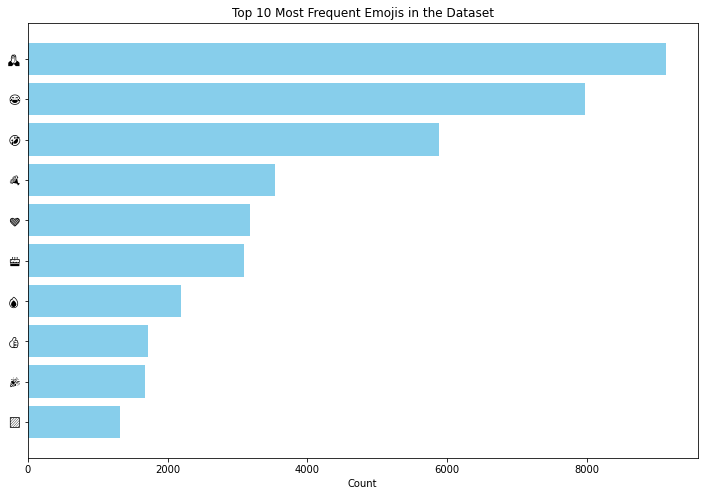

In [17]:
import matplotlib.pyplot as plt
import collections

# Extract all emojis from the 'Sentence' column
emojis = ''.join(re.findall(emoji_pattern, ' '.join(exploded_df['Sentence'])))

# Count occurrences of each emoji
emoji_counts = collections.Counter(emojis)

# List of characters to exclude
exclude_chars = ['️', '🇮', '🇳']

# Filter out the specified characters
filtered_emojis_counts = {emoji: count for emoji, count in emoji_counts.items() if emoji not in exclude_chars}

# Extract the top 10 most common emojis after filtering
top_emojis, top_counts = zip(*sorted(filtered_emojis_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot the top 10 emojis using a specific font
plt.figure(figsize=(12, 8))
plt.barh(top_emojis, top_counts, color='skyblue')

# Set the font for the y-axis labels
plt.yticks(fontname="Segoe UI Emoji")

plt.xlabel('Count')
plt.title('Top 10 Most Frequent Emojis in the Dataset')
plt.gca().invert_yaxis()  # To display the most frequent emoji at the top
plt.show()

In [18]:
sorted(filtered_emojis_counts.items(), key=lambda x: x[1], reverse=True)[:10]

[('🙏', 9133),
 ('😂', 7972),
 ('🤣', 5881),
 ('💐', 3543),
 ('❤', 3184),
 ('🎂', 3097),
 ('🔥', 2189),
 ('👍', 1723),
 ('🎉', 1675),
 ('🏻', 1317)]

In [19]:
exploded_df.head(20)

,Sentence
0,24x7 🅱️
1,re🅰️
2,king news j🅰️
3,ffery:delhi chief minister arvind kejriwal urges to prime minister narendra modi to work together to improve the country’s schools.
4,arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it!🙃
5,think you chamcha of arvind kejriwal 😃😃😃😀👍
6,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳
7,#aap #punjab #biofuel
8,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳
9,#aap



After splitting into multiple lines , for each line , 
1. If the line doesnt have an actual emoji in it, delete it. (variation selector is not an emoji)
2. If the line already present 3 times before already, remove it.

In [20]:
import re
import collections

# Regular expression pattern to match individual emojis
emoji_pattern_individual = (
    "["
    "\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F700-\U0001F77F"  # Alchemical Symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251"
    "]"
)

unicodes_to_replace = ['\ufe0f', '\U0001F3FB', '\U0001F3FC', '\U0001F3FD', '\U0001F1EE', '\U0001F1F3']

def split_multiple_emojis(sentence):    
    for u in unicodes_to_replace:
        sentence = sentence.replace(u, '')
    
    # Extract all emojis from the sentence
    emojis = re.findall(emoji_pattern_individual, sentence)
    
    # Extract the text without emojis from the sentence
    non_emoji_text = re.sub(emoji_pattern_individual, '', sentence).strip()
    
    # Counter to keep track of how many times each emoji has been used
    emoji_usage = collections.defaultdict(int)
    
    output_sentences = []
    for emoji in emojis:
        if emoji_usage[emoji] < 2:
            output_sentences.append(non_emoji_text + " " + emoji)
            emoji_usage[emoji] += 1
            
    return output_sentences

split_multiple_emojis("everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤️❤️👏🏻👏🏻🇮🇳🇮🇳")

["everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤",
 "everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤",
 "everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal 👏",
 "everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal 👏"]

In [21]:
# Apply the modified function to the 'Sentence' column of the exploded_df
split_sentences = exploded_df['Sentence'].apply(split_multiple_emojis)

# Convert the series of lists into a single list
split_sentences_list = [sentence for sublist in split_sentences for sentence in sublist]

# Convert the list back to a DataFrame
single_emoji_df = pd.DataFrame(split_sentences_list, columns=['Sentence'])

# Display the first few rows of the new DataFrame
single_emoji_df.head(20)


,Sentence
0,24x7 🅱
1,re 🅰
2,king news j 🅰
3,arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it! 🙃
4,think you chamcha of arvind kejriwal 😃
5,think you chamcha of arvind kejriwal 😃
6,think you chamcha of arvind kejriwal 😀
7,think you chamcha of arvind kejriwal 👍
8,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤
9,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤


In [22]:
# Display the first few rows of the updated DataFrame
single_emoji_df.head(50)

,Sentence
0,24x7 🅱
1,re 🅰
2,king news j 🅰
3,arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it! 🙃
4,think you chamcha of arvind kejriwal 😃
5,think you chamcha of arvind kejriwal 😃
6,think you chamcha of arvind kejriwal 😀
7,think you chamcha of arvind kejriwal 👍
8,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤
9,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤


### Create a new column in the datafram that will store the emoji that is used in the sentence

In [23]:
def extract_emoji_from_sentence(sentence):
    # Find all the emojis in the sentence
    emojis = re.findall(emoji_pattern_individual, sentence)
    # Return the first emoji found (since each sentence should have only one emoji based on your previous processing)
    return emojis[0] if emojis else None

# Apply the function to the 'Sentence' column of the single_emoji_df to create a new column 'Emoji'
single_emoji_df['Emoji'] = single_emoji_df['Sentence'].apply(extract_emoji_from_sentence)

In [24]:
single_emoji_df.shape

(65604, 2)

In [25]:
single_emoji_df = single_emoji_df.dropna(subset=['Emoji'])

In [26]:
single_emoji_df.shape

(65604, 2)

In [27]:
single_emoji_df.head(20)

,Sentence,Emoji
0,24x7 🅱,🅱
1,re 🅰,🅰
2,king news j 🅰,🅰
3,arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it! 🙃,🙃
4,think you chamcha of arvind kejriwal 😃,😃
5,think you chamcha of arvind kejriwal 😃,😃
6,think you chamcha of arvind kejriwal 😀,😀
7,think you chamcha of arvind kejriwal 👍,👍
8,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤,❤
9,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤,❤


In [28]:
single_emoji_df['Emoji_Unicode'] = single_emoji_df['Emoji'].apply(lambda x: 'U+' + ''.join([f'{ord(char):04X}' for char in x]))

In [29]:
single_emoji_df.head(20)

,Sentence,Emoji,Emoji_Unicode
0,24x7 🅱,🅱,U+1F171
1,re 🅰,🅰,U+1F170
2,king news j 🅰,🅰,U+1F170
3,arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it! 🙃,🙃,U+1F643
4,think you chamcha of arvind kejriwal 😃,😃,U+1F603
5,think you chamcha of arvind kejriwal 😃,😃,U+1F603
6,think you chamcha of arvind kejriwal 😀,😀,U+1F600
7,think you chamcha of arvind kejriwal 👍,👍,U+1F44D
8,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤,❤,U+2764
9,everyone isn't as visionary or concerned with regard to the people's or country's best interests as arvind kejriwal ❤,❤,U+2764


In [30]:
final_dataframe = single_emoji_df.copy()

In [31]:
emoji_counts = final_dataframe.groupby('Emoji').size().reset_index(name='Count')
sorted_emoji_counts = emoji_counts.sort_values(by='Count', ascending=False)

# Display the sorted emoji counts
sorted_emoji_counts.head()

,Emoji,Count
1610,🙏,7599
1537,😂,5735
1677,🤣,3886
117,❤,2739
1394,💐,2710


In [32]:
telugu_sentences = final_dataframe[final_dataframe['Sentence'].str.contains(r'[\u0C00-\u0C7F]')]
hindi_sentences = final_dataframe[final_dataframe['Sentence'].str.contains(r'[\u0900-\u097F]')]

# Displaying a few sentences from each:
print("Telugu Sentences:")
print(telugu_sentences.head())

print("\nHindi Sentences:")
print(hindi_sentences.head())


Telugu Sentences:
                                                                                                                     Sentence  \
7271                                                                                         ఈ చంఢిగర్ సీయం ఎవరక్కా కొత్తగా 🤣   
7272                                                                    uttaraprachand govt లెక్క chandigarh govt కూడా ఉందా 😂   
15248  మన bjp పార్టీ శ్రీ నరేంద్ర మోడీ గారు ఎల్లప్పుడూ ప్రతి రైతు సంక్షేమం కోసం ప్రతి రైతు అభివృద్ధి కోసం కృషి చేస్తున్నారు 🙏   
15268       మన bjp పార్టీ శ్రీ నరేంద్రమోదీ గారు నిస్వార్ధంతో ప్రతి ఒక్కరి కోసం రైతుల అభివృద్ధికి నిరంతరం కృషి చేస్తున్నారు. 🙏   
15269                                            ఇతర కొందరు స్వార్ధ రాజకీయ పార్టీలు నాయకులు చెప్పే మాయమాటలు నమ్మి మోసపోకండి 🙏   

      Emoji Emoji_Unicode  
7271      🤣       U+1F923  
7272      😂       U+1F602  
15248     🙏       U+1F64F  
15268     🙏       U+1F64F  
15269     🙏       U+1F64F  

Hindi Sentences:
                     

In [33]:
telugu_sentences.shape

(259, 3)

In [34]:
hindi_sentences.shape

(7218, 3)

In [35]:
telugu_emoji_counts = telugu_sentences.groupby('Emoji').size().reset_index(name='Count')
telugu_sorted_emoji_counts = telugu_emoji_counts.sort_values(by='Count', ascending=False)

# Display the sorted emoji counts
telugu_sorted_emoji_counts['Emoji'].head(20)

32    🙏
19    🔥
15    💐
5     ❤
33    🚩
16    💕
25    😍
2     ✋
1     ✊
8     🌺
38    🥰
12    👉
18    💪
26    😎
24    😂
23    😁
20    🔸
3     ✍
6     ➡
14    👍
Name: Emoji, dtype: object

In [36]:
hindi_emoji_counts = hindi_sentences.groupby('Emoji').size().reset_index(name='Count')
hindi_sorted_emoji_counts = hindi_emoji_counts.sort_values(by='Count', ascending=False)

# Display the sorted emoji counts
hindi_sorted_emoji_counts['Emoji'].head(20)

246    🙏
146    💐
92     🎂
254    🚩
200    😂
32     ❤
183    🔥
278    🤣
67     🌹
128    👇
96     🎉
163    💯
26     ✌
1      ▪
189    🔹
269    🤔
198    😀
135    👏
130    👉
260    🟠
Name: Emoji, dtype: object

Positive Emojis:
🙏, 💐, ❤, 💕, 😍, 🌺, 🥰, 🌹, 😎, 💯, 💪, 🎂, ✌, 👏 ,🔥

Negative Emojis:
😔, 🤔, 😂, 🤣 ,😅

Neutral Emojis:
🚩, ✋, ✊, 👉, ✍, ▪, 🔸, 🔹, ⚪, 🟠 ,😜

In [37]:
sorted_emoji_counts.head(20)

,Emoji,Count
1610,🙏,7599
1537,😂,5735
1677,🤣,3886
117,❤,2739
1394,💐,2710
1238,🎂,2420
1482,🔥,1856
1245,🎉,1331
1351,👍,1265
1345,👇,996


# Classifying the emojis

 The following lists categorize emojis into positive, negative, and neutral sentiments.

'positive_emojis' contains emojis that generally express positive emotions like happiness, love, celebration, etc.

'negative_emojis' contains emojis that generally express negative emotions like sadness, confusion, anger, etc.

'neutral_emojis' contains emojis that are typically used in a neutral context.

In [38]:
def classify_sentiment(emoji):
    positive_emojis = ["💙","🎈","🎁","🌷","💥","🤩","🤝","🧡","😇","🙌","🙂","😃","👌","♥","🎊","🎉","👍","😀","😊","😁","🙏", "💐", "❤", "💕", "😍", "🌺", "🥰", "🌹", "😎","🥳","💯", "💪", "🎂", "✌", "👏", "🔥"]
    negative_emojis = ["😔", "🤔", "😂", "🤣" , "😅","🙃","😭" ,"😡","😆","😄","🤦","🤡","😹","🤬"]
    neutral_emojis = ["🚩", "✋", "✊", "👉", "✍", "▪", "🔸", "🔹", "⚪", "🟠", "😜","👇","🙄","😝"]

    if emoji in positive_emojis:
        return "Positive"
    elif emoji in negative_emojis:
        return "Negative"
    elif emoji in neutral_emojis:
        return "Neutral"
    else:
        return "Neutral"

# Apply the function to the 'Emoji' column to create the 'Sentiment' column
final_dataframe['Sentiment'] = final_dataframe['Emoji'].apply(classify_sentiment)

In [39]:
final_dataframe.head()

,Sentence,Emoji,Emoji_Unicode,Sentiment
0,24x7 🅱,🅱,U+1F171,Neutral
1,re 🅰,🅰,U+1F170,Neutral
2,king news j 🅰,🅰,U+1F170,Neutral
3,arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it! 🙃,🙃,U+1F643,Negative
4,think you chamcha of arvind kejriwal 😃,😃,U+1F603,Positive


In [40]:
sentiment_counts = final_dataframe.groupby('Sentiment').size().reset_index(name='Count')
sentiment_counts

,Sentiment,Count
0,Negative,13003
1,Neutral,23433
2,Positive,29168


In [41]:
final_dataframe.head()

,Sentence,Emoji,Emoji_Unicode,Sentiment
0,24x7 🅱,🅱,U+1F171,Neutral
1,re 🅰,🅰,U+1F170,Neutral
2,king news j 🅰,🅰,U+1F170,Neutral
3,arvind kejriwal in future rakshabhandan pe rakhi baandh ke thread waste matt karo naajane kitne logo ke paas kapde honge agar rakhi bandhne se thread ko waste hone se rokte hai toh just wait for it! 🙃,🙃,U+1F643,Negative
4,think you chamcha of arvind kejriwal 😃,😃,U+1F603,Positive


# Building Model for Naive Bayes Model

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [43]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(final_dataframe['Sentence'])
y = final_dataframe['Sentiment']


In [44]:
clf = MultinomialNB()
clf.fit(X, y)


MultinomialNB()

## Splitting the Dataset so that it doesnt overfit.

To find the perfect split ratio , we will iterate from 60 to 91 and find the best split ratio that will not underfit or overfit the model.

In [45]:
best_accuracy = 0
best_split = None

# Iterate over possible train-test split ratios from 60/40 to 90/10
for split in range(60, 91, 1):  # Here we increase in steps of 1%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(100-split)/100, random_state=42)
    
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_split = split

print(f"Best Train/Test Split Ratio: {best_split}/{100-best_split}")
print(f"Best Accuracy: {best_accuracy*100:.2f}%")


Best Train/Test Split Ratio: 90/10
Best Accuracy: 60.30%


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training and testing sets (80/20 split)
X = vectorizer.fit_transform(final_dataframe['Sentence'])
y = final_dataframe['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Training the Naive Bayes model on the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predicting sentiments on the test data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 60.30%

Classification Report:
               precision    recall  f1-score   support

    Negative       0.60      0.70      0.64      1320
     Neutral       0.56      0.35      0.43      2279
    Positive       0.62      0.76      0.68      2962

    accuracy                           0.60      6561
   macro avg       0.59      0.60      0.58      6561
weighted avg       0.59      0.60      0.59      6561



# Applying it to Our Labelled Dataset

We will first 
1. Vectorize the lableed dataset's cleaned tweets with the same vectorizer
2. feed the tweets into our naive bayes model

In [47]:
X_new = vectorizer.transform(BaseLineApproach_Final_tweets['Cleaned_Tweet'])
predictions = clf.predict(X_new)
BaseLineApproach_Final_tweets['Predicted_Sentiment'] = predictions

emoji_based_correct_predictions = BaseLineApproach_Final_tweets[BaseLineApproach_Final_tweets['Predicted_Sentiment'] == BaseLineApproach_Final_tweets['Manual_Label']].shape[0]
emoji_based_total_predictions = BaseLineApproach_Final_tweets.shape[0]
emoji_based_accuracy = emoji_based_correct_predictions / emoji_based_total_predictions
emoji_based_accuracy


0.68

In [48]:
fasttext_correct_predictions = BaseLineApproach_Final_tweets[BaseLineApproach_Final_tweets['Sentiment'] == BaseLineApproach_Final_tweets['Manual_Label']].shape[0]
fasttext_total_predictions = BaseLineApproach_Final_tweets.shape[0]
fasttext_accuracy = fasttext_correct_predictions / fasttext_total_predictions
fasttext_accuracy

0.6

#  Model Evaluation and Comparision with Base Line Model

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

unique_labels = BaseLineApproach_Final_tweets['Manual_Label'].unique()

# For Fasttext Word Embedding Model
fasttext_precision = precision_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'], labels=unique_labels, average='weighted')
fasttext_recall = recall_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'], labels=unique_labels, average='weighted')
fasttext_f1 = f1_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'], labels=unique_labels, average='weighted')
fasttext_confusion = confusion_matrix(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'], labels=unique_labels)

# For Emoji-Based Model
emoji_based_precision = precision_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'], labels=unique_labels, average='weighted')
emoji_based_recall = recall_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'], labels=unique_labels, average='weighted')
emoji_based_f1 = f1_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'], labels=unique_labels, average='weighted')
emoji_based_confusion = confusion_matrix(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'], labels=unique_labels)


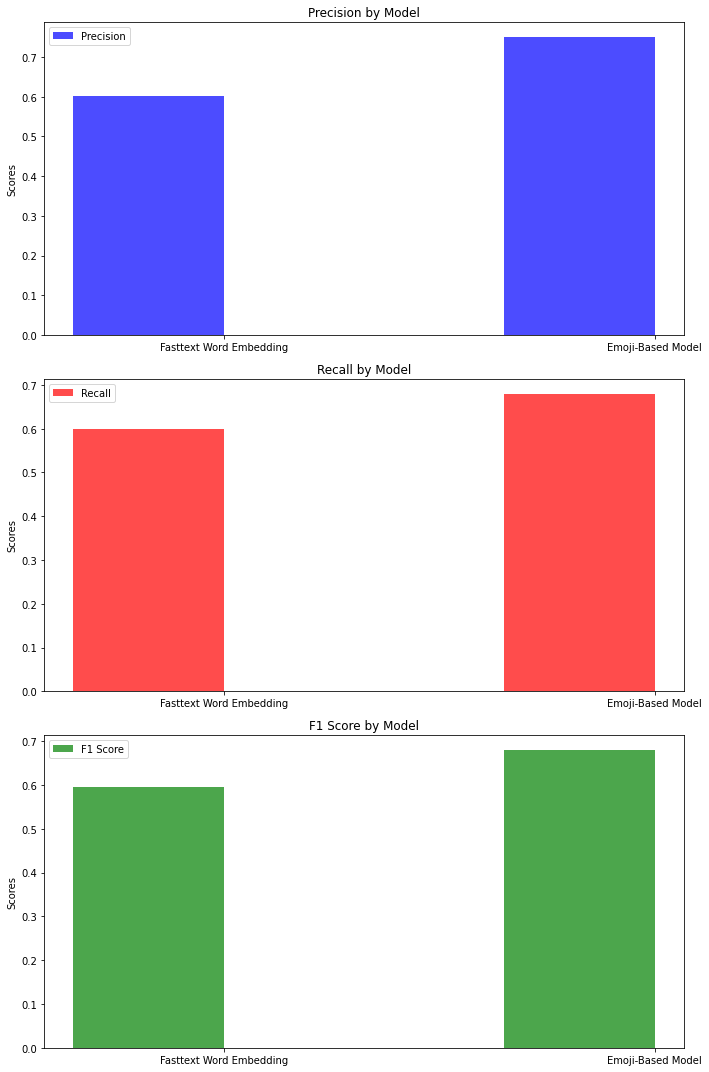

In [50]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Fasttext Word Embedding', 'Emoji-Based Model']
precision_values = [fasttext_precision, emoji_based_precision]
recall_values = [fasttext_recall, emoji_based_recall]
f1_values = [fasttext_f1, emoji_based_f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Precision Bar Chart
ax[0].bar(x - width/2, precision_values, width, label='Precision', color='blue', alpha=0.7)
ax[0].set_ylabel('Scores')
ax[0].set_title('Precision by Model')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

# Recall Bar Chart
ax[1].bar(x - width/2, recall_values, width, label='Recall', color='red', alpha=0.7)
ax[1].set_ylabel('Scores')
ax[1].set_title('Recall by Model')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

# F1 Score Bar Chart
ax[2].bar(x - width/2, f1_values, width, label='F1 Score', color='green', alpha=0.7)
ax[2].set_ylabel('Scores')
ax[2].set_title('F1 Score by Model')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()

fig.tight_layout()
plt.show()


In [51]:
# Writing the dataframe to a CSV file
file_path = "Final_Results_tweets.csv"
BaseLineApproach_Final_tweets.to_csv(file_path, index=False)

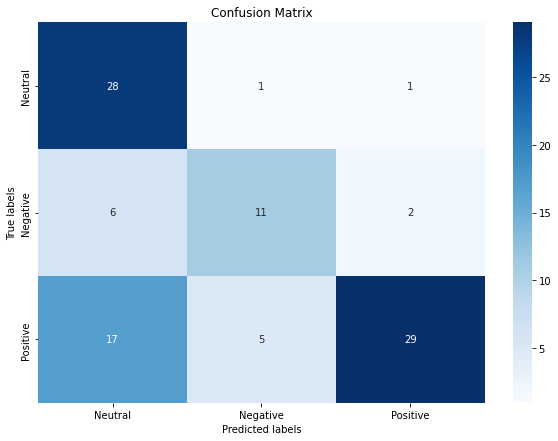

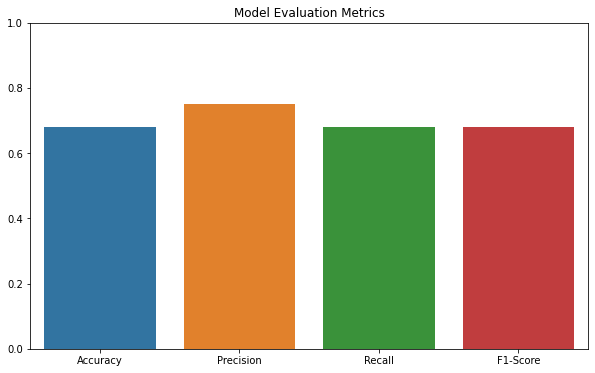

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Extracting the necessary columns
y_true = BaseLineApproach_Final_tweets['Manual_Label']
y_pred = BaseLineApproach_Final_tweets['Predicted_Sentiment']

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Bar chart for accuracy, precision, recall, and F1-score
metrics = [accuracy_score(y_true, y_pred), 
           precision_score(y_true, y_pred, average='weighted'), 
           recall_score(y_true, y_pred, average='weighted'), 
           f1_score(y_true, y_pred, average='weighted')]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=metrics)
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # To scale the y-axis between 0 and 1
plt.show()


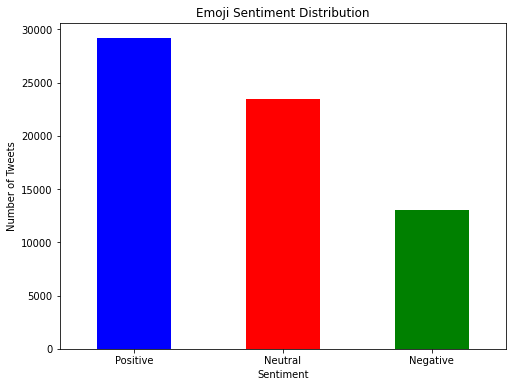

In [53]:
# Calculate sentiment distribution
sentiment_distribution = final_dataframe['Sentiment'].value_counts()

# Plotting
sentiment_distribution.plot(kind='bar', color=['blue', 'red', 'green'], figsize=(8, 6))
plt.title('Emoji Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)  # to keep the labels horizontal
plt.show()

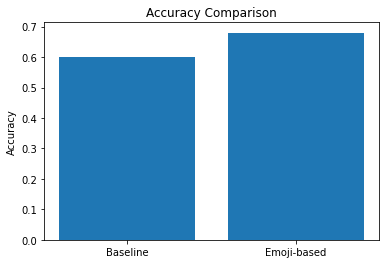

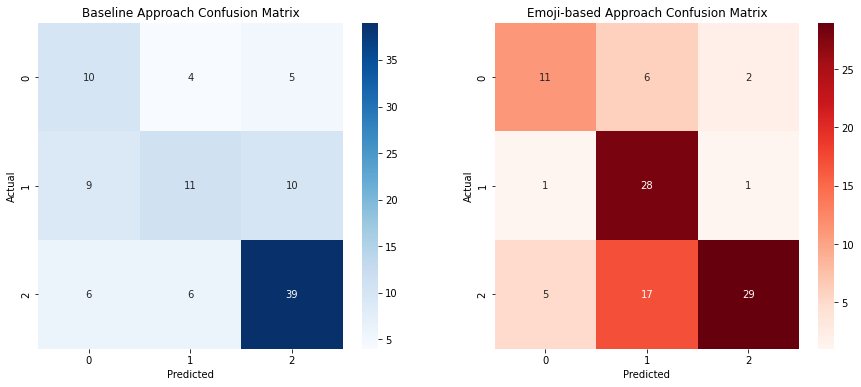

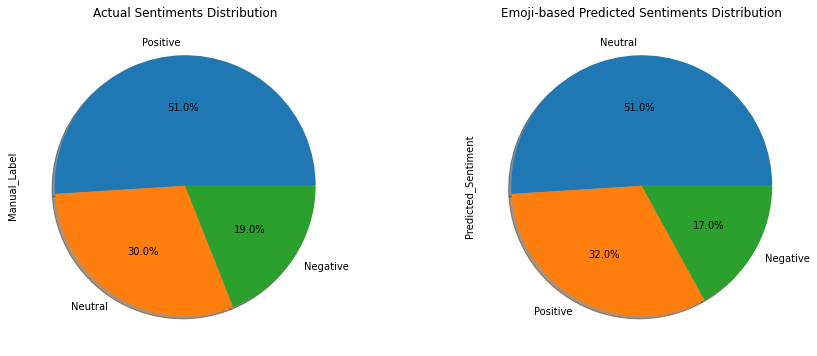

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Sample Data (Replace this with your actual dataframe)
# BaseLineApproach_Final_tweets = ...

# 1. Bar plot for accuracy comparison
baseline_accuracy = accuracy_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'])
emoji_accuracy = accuracy_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'])

labels = ['Baseline', 'Emoji-based']
accuracies = [baseline_accuracy, emoji_accuracy]

plt.bar(labels, accuracies)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

# 2. Confusion matrix for both approaches
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

baseline_cm = confusion_matrix(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'])
emoji_cm = confusion_matrix(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'])

sns.heatmap(baseline_cm, annot=True, ax=ax[0], cmap="Blues", fmt='g')
ax[0].set_title('Baseline Approach Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(emoji_cm, annot=True, ax=ax[1], cmap="Reds", fmt='g')
ax[1].set_title('Emoji-based Approach Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

# 3. Pie chart for sentiment distribution in actual and predicted sentiments
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
BaseLineApproach_Final_tweets['Manual_Label'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
BaseLineApproach_Final_tweets['Predicted_Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Actual Sentiments Distribution')
ax[1].set_title('Emoji-based Predicted Sentiments Distribution')
plt.show()


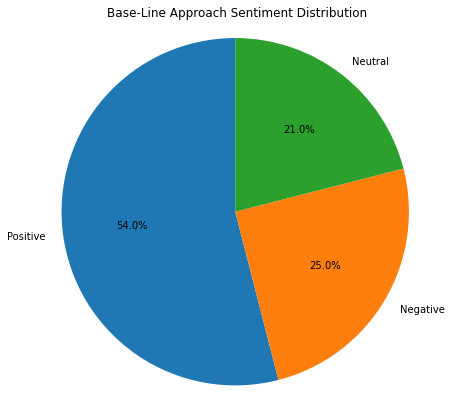

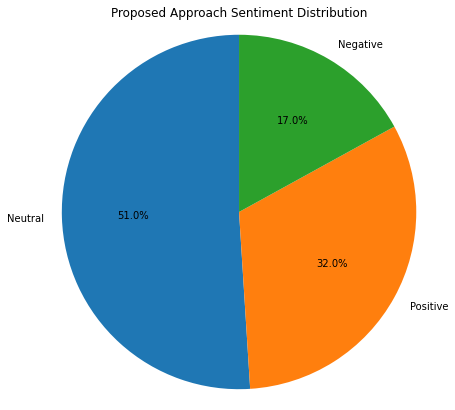

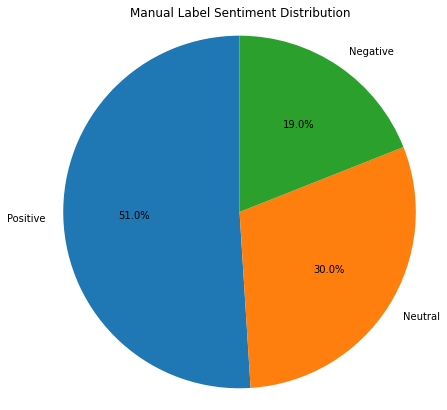

In [55]:
# Pie chart for Base-Line Approach
base_line_sentiments = BaseLineApproach_Final_tweets['Sentiment'].value_counts()

# Pie chart for Proposed Approach
proposed_sentiments = BaseLineApproach_Final_tweets['Predicted_Sentiment'].value_counts()

# Manual Label Sentiment Distribution
manual_sentiments = BaseLineApproach_Final_tweets['Manual_Label'].value_counts()


# Plotting the pie charts separately

fig, ax = plt.subplots(figsize=(7, 7))

# Base-Line Approach Pie Chart
ax.pie(base_line_sentiments, labels=base_line_sentiments.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Base-Line Approach Sentiment Distribution')
plt.show()

fig, ax = plt.subplots(figsize=(7, 7))
# Proposed Approach Pie Chart
ax.pie(proposed_sentiments, labels=proposed_sentiments.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Proposed Approach Sentiment Distribution')
plt.show()

fig, ax = plt.subplots(figsize=(7, 7))
# Manual Label Pie Chart
ax.pie(manual_sentiments, labels=manual_sentiments.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Manual Label Sentiment Distribution')
plt.show()


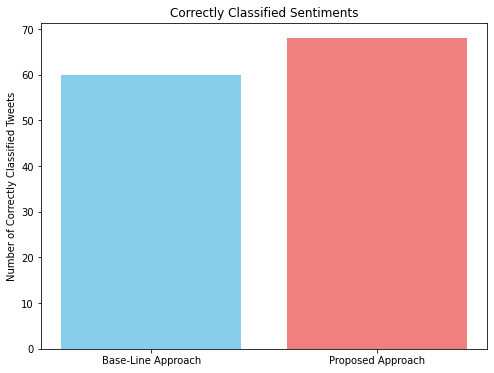

In [56]:
# Calculate the number of correctly classified sentiments for both approaches
correct_baseline = BaseLineApproach_Final_tweets[BaseLineApproach_Final_tweets['Sentiment'] == BaseLineApproach_Final_tweets['Manual_Label']].shape[0]
correct_proposed = BaseLineApproach_Final_tweets[BaseLineApproach_Final_tweets['Predicted_Sentiment'] == BaseLineApproach_Final_tweets['Manual_Label']].shape[0]

plt.figure(figsize=(8, 6))
plt.bar(['Base-Line Approach', 'Proposed Approach'], [correct_baseline, correct_proposed], color=['skyblue', 'lightcoral'])
plt.title('Correctly Classified Sentiments')
plt.ylabel('Number of Correctly Classified Tweets')
plt.show()


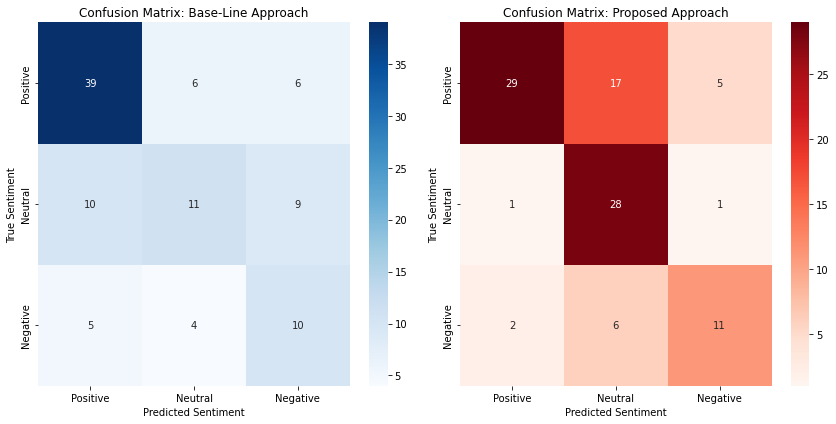

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Base-Line Approach Confusion Matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
cm_baseline = confusion_matrix(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'], labels=["Positive", "Neutral", "Negative"])
sns.heatmap(cm_baseline, annot=True, cmap="Blues", fmt='g', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.title('Confusion Matrix: Base-Line Approach')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')

# Proposed Emoji-based Approach Confusion Matrix
plt.subplot(1, 2, 2)
cm_proposed = confusion_matrix(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'], labels=["Positive", "Neutral", "Negative"])
sns.heatmap(cm_proposed, annot=True, cmap="Reds", fmt='g', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.title('Confusion Matrix: Proposed Approach')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')

plt.tight_layout()
plt.show()


### Lets finally build a table comparing our scores of both base line approach and proposed approach

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Base-Line Approach Metrics
accuracy_baseline = accuracy_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'])
precision_baseline = precision_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'], average='weighted')
recall_baseline = recall_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'], average='weighted')
f1_baseline = f1_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Sentiment'], average='weighted')

# Proposed Approach Metrics
accuracy_proposed = accuracy_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'])
precision_proposed = precision_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'], average='weighted')
recall_proposed = recall_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'], average='weighted')
f1_proposed = f1_score(BaseLineApproach_Final_tweets['Manual_Label'], BaseLineApproach_Final_tweets['Predicted_Sentiment'], average='weighted')

# Creating a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Base-Line Approach': [accuracy_baseline, precision_baseline, recall_baseline, f1_baseline],
    'Proposed Approach': [accuracy_proposed, precision_proposed, recall_proposed, f1_proposed]})
metrics_df.head(10)


,Metric,Base-Line Approach,Proposed Approach
0,Accuracy,0.600000,0.680000
1,Precision,0.601476,0.749835
2,Recall,0.600000,0.680000
3,F1 Score,0.594633,0.679904
